## Project 4 - EDA and Analysis
Jeff Patra

Following the webscraping my code was quite messy so I decided to start a new notebook for the eda and analysis


I had quite a few probems web scraping and ultimately ran out of time.  In the end I was able to webscrape however i ran into two major issues:

1. I was getting blocked.
    I think this was due to using selenium.  I must have been cycling through the pages too frequently and became detected so I ended up getting blocked.  I was able to scrape about 150 jobs at a time before getting kicked out.  Once kicked out I had to wait an hour or so before being let back in.
    
2. My second attempt I managed to scrape without using selenium.  I was able to grab more entries however some of the urls were expired jobs.  My code was not setup to handle this so it stopped running.  As a result I had to split up my urls into segments and re run.  Eventually I ended up with a bunch of csv files that I stitched together.  Not ideal but I was just out of time.

Due to the problems I was having scraping I was unable to gather 1000 entries.  If I had more time to debug my code then I would have gathered more entries.  In the end I ended up with 586 entries.

With that said I will now start my analysis with this data set.


In [27]:
#Credit yuanyuanshi
#https://github.com/yuanyuanshi/Data_Skills/blob/master/data_skills_2.py

#Credit:  Massive props to Byron Stuart for helping me getting this code running

import re
from nltk.corpus import stopwords #conda install nltk

#Import Goose here: https://pypi.python.org/pypi/goose-extractor/
#Follow instructions.  It is NOT a straight forward pip install
from goose import Goose 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
import time
from scrapy.selector import Selector
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
seek_data = '/Users/gopetro/documents/dsi/materials/project4/job_data_all.csv'

seek = pd.read_csv(seek_data)
seek.head()

,Date_Posted,Industry,Location,Salary,Skills,Title,Type
0,"Today, 2:03pm",Information & Communication Technology,Melbourne Bayside & South Eastern Suburbs,NaN,"['excel', 'sql']",Data Analyst - 12 months Fixed Term Contract,Contract/Temp
1,"Today, 1:15pm",Information & Communication Technology,Brisbane CBD & Inner Suburbs,$91 - $97 p/h,[],Data Analyst,Contract/Temp
2,"Today, 2:00pm",Government & Defence,Brisbane Northern Suburbs,NaN,[],Business Analyst - Data Analyst Chermside,Contract/Temp
3,"Today, 12:41pm",Information & Communication Technology,Brisbane CBD & Inner Suburbs,NaN,['sql'],Data Analyst,Contract/Temp
4,"Today, 10:34am",Government & Defence,"Sydney CBD, Inner West & Eastern Suburbs",$80 p/h,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract/Temp


In [29]:
seek.shape

(586, 7)

The above data set was acquired using a combination of searches on www.seek.com.au.  The classification and location were left blank to maximize the total hits.  The searches used were:
    1. Data Scientist (64)
    2. Data Analyst (320)
    3. Analysics COnsultant (36 jobs)
    4. Business Intelligence (704 jobs)

The total number of job adds were 1124 jobs.  Due to the issues I was having going to each url I was only able to grab 586 jobs.  
To re-iterate, if I had more time I could debig my code to retreive more entires so the scraping process would be more smooth. 

One thing that worked out really well for me was that I used the natural language processing during the webscrape.  This has had a huge impact
on the amount of cleaning now required because I was able to filter out all unecessary words and grab only the key words of interest.  

Now we will begin cleaning the data set.

In [30]:
#Don't really need the date so we'll drop this
seek = seek.drop(seek.columns[[0]],axis=1)
seek.head()
#df.drop(df.columns[[0, 1, 3]], axis=1)

,Industry,Location,Salary,Skills,Title,Type
0,Information & Communication Technology,Melbourne Bayside & South Eastern Suburbs,NaN,"['excel', 'sql']",Data Analyst - 12 months Fixed Term Contract,Contract/Temp
1,Information & Communication Technology,Brisbane CBD & Inner Suburbs,$91 - $97 p/h,[],Data Analyst,Contract/Temp
2,Government & Defence,Brisbane Northern Suburbs,NaN,[],Business Analyst - Data Analyst Chermside,Contract/Temp
3,Information & Communication Technology,Brisbane CBD & Inner Suburbs,NaN,['sql'],Data Analyst,Contract/Temp
4,Government & Defence,"Sydney CBD, Inner West & Eastern Suburbs",$80 p/h,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract/Temp


In [31]:
type(seek.Location)
#seek.Location.split()[0]
#seek$Location <- strsplit(seek$City, " ")[[1]][1]

#Dataframe1$COL2 <- strsplit(Dataframe1$COL1, " ")[[1]][1]

pandas.core.series.Series

In [32]:
#str(seek.Location[0]).split()[0]
City=[]
for row in seek.Location:
    City.append(str(row).split()[0])

seek['City'] = City
seek.head()

,Industry,Location,Salary,Skills,Title,Type,City
0,Information & Communication Technology,Melbourne Bayside & South Eastern Suburbs,NaN,"['excel', 'sql']",Data Analyst - 12 months Fixed Term Contract,Contract/Temp,Melbourne
1,Information & Communication Technology,Brisbane CBD & Inner Suburbs,$91 - $97 p/h,[],Data Analyst,Contract/Temp,Brisbane
2,Government & Defence,Brisbane Northern Suburbs,NaN,[],Business Analyst - Data Analyst Chermside,Contract/Temp,Brisbane
3,Information & Communication Technology,Brisbane CBD & Inner Suburbs,NaN,['sql'],Data Analyst,Contract/Temp,Brisbane
4,Government & Defence,"Sydney CBD, Inner West & Eastern Suburbs",$80 p/h,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract/Temp,Sydney


In [33]:
#Drop the Location column now that we have City
seek = seek.drop(seek.columns[[1]],axis=1)
seek.head()

,Industry,Salary,Skills,Title,Type,City
0,Information & Communication Technology,NaN,"['excel', 'sql']",Data Analyst - 12 months Fixed Term Contract,Contract/Temp,Melbourne
1,Information & Communication Technology,$91 - $97 p/h,[],Data Analyst,Contract/Temp,Brisbane
2,Government & Defence,NaN,[],Business Analyst - Data Analyst Chermside,Contract/Temp,Brisbane
3,Information & Communication Technology,NaN,['sql'],Data Analyst,Contract/Temp,Brisbane
4,Government & Defence,$80 p/h,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract/Temp,Sydney


In [34]:
#Let's look at the 'Type' column.
seek.Type.unique()

array(['Contract/Temp', 'Full Time', 'Part Time'], dtype=object)

In [35]:
#Change 'Contract/Temp' to 'Contract'
seek.Type = seek.Type.str.replace('Contract/Temp','Contract')
seek.Type.unique()
#ufo.columns = ufo.columns.str.replace('/Temp', '')

array(['Contract', 'Full Time', 'Part Time'], dtype=object)

In [36]:
#Let's view Industry types
seek.Industry.unique()

#There are quite a few industry tyoes so may be difficult to categorize.  Will leave this for now

array(['Information & Communication Technology', 'Government & Defence',
       'Consulting & Strategy', 'Science & Technology', 'Accounting',
       'Banking & Financial Services', 'Marketing & Communications',
       'Sales', 'Engineering', 'Advertising, Arts & Media',
       'Insurance & Superannuation', 'Mining, Resources & Energy',
       'Real Estate & Property', 'Healthcare & Medical',
       'Manufacturing, Transport & Logistics',
       'Administration & Office Support', 'Construction',
       'Education & Training', 'Human Resources & Recruitment',
       'Community Services & Development',
       'Call Centre & Customer Service', 'Retail & Consumer Products',
       'Design & Architecture'], dtype=object)

In [37]:
#Lets look at 'Title'
seek.Title.unique()

array(['Data Analyst - 12 months Fixed Term Contract', 'Data Analyst',
       'Business Analyst - Data Analyst Chermside',
       'Data Analyst I NSW Government I $80p/h',
       'Business Analyst/ Data Analyst',
       'Junior Analyst, Market Data Systems, Banking',
       'Business Analyst - Data Analyst',
       'Principal Data Analyst | ArcGIS | Power BI | Qlik',
       'Business & Data Analyst',
       'Data Analyst, Corporate and Asset Finance Group',
       'Principal Data Analyst', 'Junior Data Analyst | Merivale',
       'Senior Data Analyst', 'Data Analyst - Analytics',
       'Data Analyst - Immediate Start', 'Graduate Data Analyst',
       'Data Analyst - Data Analytics, Customer Insight, SQL Reporting',
       'Data Analyst - Cleanse and Analysis',
       'Data Analyst - Javascript or Python Scripting',
       'Data Modelling Consultant', 'Data Analyst - temp',
       'Business Data Analyst', 'Data Analyst - URGENT',
       'Data Analyst - Customer Insights, Loyalty & Camp

In [38]:
#Let's try to clean this up a little bit.  
#First lets find all entries with a '-'
#then drop all words after that.

temp=[]

seek.Title[0]
sep='-'
for row in seek.Title:
#     if sep == '-' :
         temp.append(row.split(sep,1)[0])
seek['Title'] = temp
seek.head()

#Credit: http://stackoverflow.com/questions/904746/how-to-remove-all-characters-after-a-specific-character-in-python

,Industry,Salary,Skills,Title,Type,City
0,Information & Communication Technology,NaN,"['excel', 'sql']",Data Analyst,Contract,Melbourne
1,Information & Communication Technology,$91 - $97 p/h,[],Data Analyst,Contract,Brisbane
2,Government & Defence,NaN,[],Business Analyst,Contract,Brisbane
3,Information & Communication Technology,NaN,['sql'],Data Analyst,Contract,Brisbane
4,Government & Defence,$80 p/h,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney


In [39]:
#For salary prediction later on we will only need the rows with values.

seek_nonull = seek[seek.Salary.notnull()]
seek_nonull.shape

#We started with 586 rows and now down to 210.

(210, 6)

In [40]:
#Let's look at jobn titles again
seek_nonull.Title.unique()

array(['Data Analyst', 'Data Analyst I NSW Government I $80p/h',
       'Principal Data Analyst | ArcGIS | Power BI | Qlik',
       'Principal Data Analyst', 'Junior Data Analyst | Merivale',
       'Senior Data Analyst', 'Data Analyst ', 'Business Data Analyst',
       'Data Analyst | Media Focused Agency | Market Research',
       'Data Analyst / Data Scientist', 'Product Quality Analyst',
       'Junior Salesforce Data Analyst', 'Forensic Data Analytics',
       'DATA ANALYST > OUTSTANDING COMPANY', 'SQL Analyst',
       'Junior SQL Data Analyst', 'Business/Data Analyst', 'Analyst',
       'Project Officer ', 'SAP Master Data Specialist',
       'Junior Business Analyst ',
       'Market Data Analyst, Investment Banking',
       'Data Analytics Consultant', 'Pricing/Product Coordinator',
       'Data Analyst & Support Officer', 'Master Data Analyst',
       'Senior Data Analyst / Steward', 'BI Developer / Consultant ',
       'Digital Project Manager / Digital Producer',
       'Qua

In [41]:
#Not working
#Now lets define some key words for job titles

#job_keywords = ['Data', 'Analyst','Senior', 'Junior', 'Scientist', 'Business', 'Graduate', 'Manager', 'Management', 'Specialist','Engineer', '_Consultant', 'Consultant', 'Analysts','Analytics','Project', 'Officer','Customer','Insights','SQL','Coordinator','Operations','Research','Lead','Principal','Staff','Developer','Tester','Specialist','Risk','Snr.','Jnr', 'Director','Intelligence','Executive','CEO','Architect',]

Seek_nonnull

NameError: name 'Seek_nonnull' is not defined

In [42]:
#Credit master Byron Stuart

#Function that converts salary column into annual salary.  If text only then return none
import re

def adjust_salary(in_salary):
    #deal with weird exceptions, add/remove cases as needed but can't deal with everything
    in_salary = in_salary.replace('Bonus 5K', '')
    in_salary = in_salary.replace('9.5%', '')
    in_salary = in_salary.replace('Level 6 (SACS Grade 5)', '')
    in_salary = in_salary.replace('13% Super + 50% Insurance Discount', '')
    in_salary = in_salary.replace('Grade 7', '')
    in_salary = in_salary.replace('120 - 140', '120000 - 140000')
    in_salary = in_salary.replace('6+ month Contract', '')
    in_salary = in_salary.replace('C120 K', '120000')
    in_salary = in_salary.replace('Base  + Bonus (12 Mnth Contract)','')

    # http://stackoverflow.com/questions/18256926/python-regex-for-dollar-amounts-including-commas-and-decimals
    new_salary = ' '.join([ ''.join(x[0]) for x in re.findall(r'(\$?\d+([,\.]\d+)?[kK]?)', in_salary) ])
    if new_salary == '':
        return None
    
    new_salary = new_salary.replace('k', 'K').replace('K', '000').replace('$', '').replace(',', '')
    new_salary_list = new_salary.split()
    
    
    # get rid of any cents
    for i, val in enumerate(new_salary_list):
        new_salary_list[i] = int(new_salary_list[i].split('.')[0])
    
    
    # if we have 4 numbers remove the last 2
    if len(new_salary_list) == 4:
        del new_salary_list[3]
        del new_salary_list[2]

    cleaned = False
    # clean up numbers and reduce from 3 to 2
    if len(new_salary_list) == 3:
        if new_salary_list[0] < new_salary_list[2]:
            del new_salary_list[0]
        else:
            del new_salary_list[2]
        cleaned = True

    # clean up numbers and multiply the first number by 1000 if the second number is in the 1000s
    if len(new_salary_list) == 2 and not cleaned:
        if new_salary_list[1] == 0:
            return None
        if float(new_salary_list[0]) / float(new_salary_list[1]) < 0.01:
            new_salary_list[0] *= 1000
        cleaned = True
        #print new_salary_list[0] / new_salary_list[1]
    
    # get an average of the 2 numbers
    if len(new_salary_list) == 2:
        new_salary = (new_salary_list[0] + new_salary_list[1]) / 2

    # clean up the last number if necessary
    if len(new_salary_list) == 1 and not cleaned:
        new_salary = new_salary_list[0]

    # this string has not been cleaned
    if (type(new_salary) is str):
        print('Exception, salary not extracted:', in_salary)
        return None
    
    # assume per hour, calculate yearly
    if new_salary < 250:
        new_salary *= 38 * 52
    # assume per day, calculate yearly
    elif new_salary < 1200:
        new_salary *= 5 * 52
    # anything left should be yearly already

    print 'Old:', in_salary, 'New:', int(new_salary)
    return int(new_salary)

In [43]:
salary = list(seek_nonull.Salary)
print salary[0:5]

['$91 - $97 p/h', '$80 p/h', '$80 p/h', '$80 p/h', '$30 - $40 p/h']


In [44]:
salary1=[]
len(salary)
for row in range(0,len(salary)):
    salary1.append(adjust_salary(salary[row]))

Old: $91 - $97 p/h New: 185744
Old: $80 p/h New: 158080
Old: $80 p/h New: 158080
Old: $80 p/h New: 158080
Old: $30 - $40 p/h New: 69160
Old: $111 p/h New: 219336
Old: $400 - $500 p.d New: 117000
Old: $111 p/h New: 219336
Old: $70000 plus superannuation New: 70000
Old: $700 - $800 p.d New: 195000
Old: $50 - $55 p/h annuation New: 102752
Old: $110K  New: 110000
Old: $50k - $52k p.a. + plus super New: 51000
Old: $25-$27 p/h plus superannuation New: 51376
Old: $570 p.d New: 148200
Old: $70000 - $85000 New: 77500
Old: $600 p.d New: 156000
Old: $80K-$120K Packages New: 100000
Old: $75k - $90k New: 82500
Old: $70000.00 New: 70000
Old: $550 - $750 p.d New: 169000
Old: $40.37 - $44.15 p/h New: 82992
Old: $40.37 - $44.15 p/h New: 82992
Old: $500 - $600 p.d annuation New: 143000
Old: $380 - $450 p.d New: 107900
Old: $60-$70k New: 65000
Old: $550 - $700 p.d New: 162500
Old: $650 - $730 p.d annuation New: 179400
Old: $70000 base New: 70000
Old: $70000 - $79999 New: 74999
Old: $550 p.d New: 143000
O

In [45]:
seek_nonull.Salary=salary1

In [46]:
#This dataframe has all the jobs with salary information where salary is annulaized
seek_nonull.head(10)

,Industry,Salary,Skills,Title,Type,City
1,Information & Communication Technology,185744.0,[],Data Analyst,Contract,Brisbane
4,Government & Defence,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
5,Consulting & Strategy,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
6,Science & Technology,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
12,Accounting,69160.0,['excel'],Data Analyst,Contract,Sydney
13,Information & Communication Technology,219336.0,['excel'],Principal Data Analyst | ArcGIS | Power BI | Qlik,Contract,Brisbane
20,Information & Communication Technology,117000.0,"['mining', 'tableau']",Data Analyst,Contract,Melbourne
24,Information & Communication Technology,219336.0,[],Principal Data Analyst,Contract,Brisbane
26,Information & Communication Technology,NaN,[],Junior Data Analyst | Merivale,Contract,Sydney
29,Marketing & Communications,70000.0,"['excel', 'spss']",Data Analyst,Full Time,Melbourne


In [47]:
#Not all salary columns have values so we need to drop Nan

seek_fnl = seek_nonull[seek_nonull.Salary.notnull()]

#seek_nonull = seek[seek.Salary.notnull()]
#seek_nonull.shape

seek_fnl.shape

#Notice we are down to 137 jobs with salaries

(137, 6)

In [48]:
seek_fnl.head(10)

,Industry,Salary,Skills,Title,Type,City
1,Information & Communication Technology,185744.0,[],Data Analyst,Contract,Brisbane
4,Government & Defence,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
5,Consulting & Strategy,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
6,Science & Technology,158080.0,"['tableau', 'r', 'sas', 'excel', 'spss']",Data Analyst I NSW Government I $80p/h,Contract,Sydney
12,Accounting,69160.0,['excel'],Data Analyst,Contract,Sydney
13,Information & Communication Technology,219336.0,['excel'],Principal Data Analyst | ArcGIS | Power BI | Qlik,Contract,Brisbane
20,Information & Communication Technology,117000.0,"['mining', 'tableau']",Data Analyst,Contract,Melbourne
24,Information & Communication Technology,219336.0,[],Principal Data Analyst,Contract,Brisbane
29,Marketing & Communications,70000.0,"['excel', 'spss']",Data Analyst,Full Time,Melbourne
31,Information & Communication Technology,195000.0,"['tableau', 'excel', 'sql']",Senior Data Analyst,Contract,Sydney


In [49]:
seek_fnl.describe()

,Salary
count,137.000000
mean,128266.985401
std,47628.031876
min,50000.000000
25%,95000.000000
50%,115000.000000
75%,158080.000000
max,273000.000000


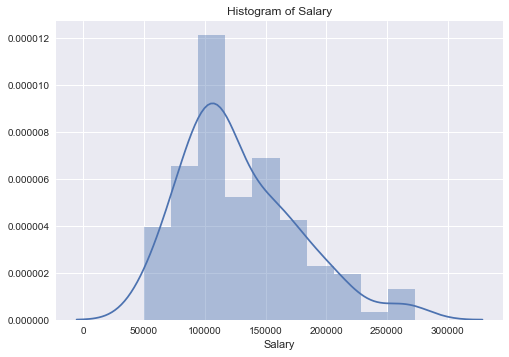

In [50]:
#let's see what the salary distribution looks like
import seaborn as sns
sns.distplot(seek_fnl.Salary, hist=True)
plt.title('Histogram of Salary')
plt.show()

#In general this looks like a log normal distribution

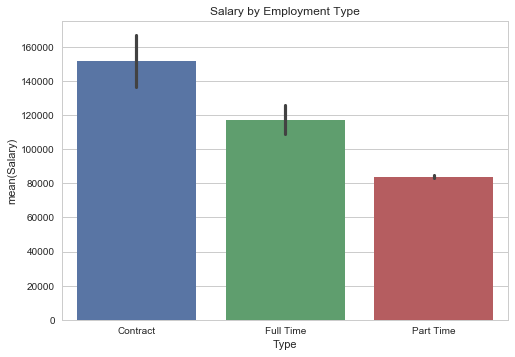

In [51]:
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=seek_fnl.Type, y=seek_fnl.Salary, data=seek_fnl)
plt.title('Salary by Employment Type')
plt.show()

#Average salaries grouped by employment type.  Not suprisingly, salaries for contractors is the 
#highest.  Contractors generally command higher rates because of specialized work and a company
#does not need to commit to an employee's development.  In doing so the employee carries more risk


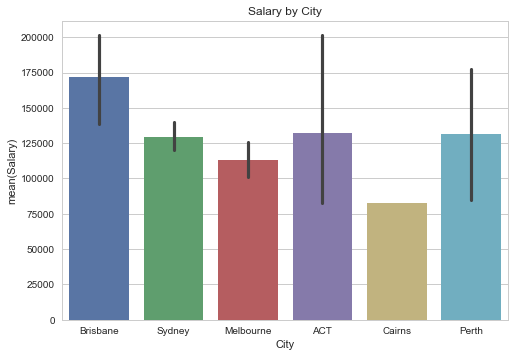

In [52]:
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=seek_fnl.City, y=seek_fnl.Salary, data=seek_fnl)
plt.title('Salary by City')
plt.show()
#Mean salary by city.  Suprisiningly Brisbane has the highest.  HJowever this could be mis leading because it 
#all job types are in here.  Also, I'm not sure how many jobs are in each category.  The large spread 
#for ACT is likely due to one or two jobs.

In [53]:
#Let's have a look at jobs where salary is below 25% percentile
low = seek_fnl.query('Salary <= 95000')
print low.shape

(36, 6)


In [54]:
low.Skills.unique()

array(["['excel']", "['excel', 'spss']", '[]',
       "['r', 'sas', 'mysql', 'sql']", "['tableau']",
       "['tableau', 'python', 'r', 'sql']", "['sas', 'sql']",
       "['tableau', 'sql']", "['mining', 'r']", "['mining', 'sql']",
       "['python']", "['sql']", "['bachelor']", "['excel', 'sql']"], dtype=object)

In [55]:
low.Title.unique()

array(['Data Analyst', 'Data Analyst ',
       'Data Analyst | Media Focused Agency | Market Research',
       'Product Quality Analyst', 'Junior Salesforce Data Analyst',
       'Junior SQL Data Analyst', 'Business Data Analyst',
       'Data Analytics Consultant', 'Pricing/Product Coordinator',
       'Data Analyst & Support Officer', 'QA / Data Tester ',
       'Sr. Data Scientist ', 'DATA SCIENCE EXPERT',
       'Business Development Manager | Business Intelligence',
       'Assistant Business Analyst',
       'Business Insights Analyst | Greenfields Role',
       'Reporting Analyst ', 'Designer/ Dev ',
       'Graduate Account Development Representative', 'Project Manager',
       'Recruitment Consultant ', 'Project Support Analyst',
       'I.T Recruitment Consultant', 'Account Executive', 'SQL Developer'], dtype=object)

Jobs with salaries in the lowest quartile range are predominatly have the terms:
-Data Analyst
-Junior
-Graduate

The skills that are requsted are predominatly excel, tableau and sql.

There is also very few roles that say:
data scientist

In [56]:
print low.Title.unique()

['Data Analyst' 'Data Analyst '
 'Data Analyst | Media Focused Agency | Market Research'
 'Product Quality Analyst' 'Junior Salesforce Data Analyst'
 'Junior SQL Data Analyst' 'Business Data Analyst'
 'Data Analytics Consultant' 'Pricing/Product Coordinator'
 'Data Analyst & Support Officer' 'QA / Data Tester ' 'Sr. Data Scientist '
 'DATA SCIENCE EXPERT'
 'Business Development Manager | Business Intelligence'
 'Assistant Business Analyst'
 'Business Insights Analyst | Greenfields Role' 'Reporting Analyst '
 'Designer/ Dev ' 'Graduate Account Development Representative'
 'Project Manager' 'Recruitment Consultant ' 'Project Support Analyst'
 'I.T Recruitment Consultant' 'Account Executive' 'SQL Developer']


In [57]:
#Now lets look at jobs in the upper quartile
high = seek_fnl.query('Salary >= 158000')
print high.shape

(35, 6)


In [58]:
high.Skills.unique()

array(['[]', "['tableau', 'r', 'sas', 'excel', 'spss']", "['excel']",
       "['tableau', 'excel', 'sql']", "['tableau']",
       "['mining', 'tableau', 'sql']", "['r', 'excel']", "['python']",
       "['python', 'r', 'sql']", "['python', 'c++', 'java', 'r']",
       "['python', 'r']", "['python', 'mining', 'r', 'sas']",
       "['mining', 'sas', 'sql']", "['hive']", "['mining']",
       "['r', 'excel', 'sql']", "['sql']",
       "['tableau', 'python', 'r', 'sas', 'sql']"], dtype=object)

In [59]:
high.Title.unique()

array(['Data Analyst', 'Data Analyst I NSW Government I $80p/h',
       'Principal Data Analyst | ArcGIS | Power BI | Qlik',
       'Principal Data Analyst', 'Senior Data Analyst',
       'DATA ANALYST > OUTSTANDING COMPANY', 'Business/Data Analyst',
       'Analyst', 'Data Modeller', 'DATA SCIENTIST ',
       'Senior Data Scientist', 'JAPANESE', 'Data Scientist ',
       'Principal Data Scientist', 'Director, Analytics',
       'Business Analyst', 'Management Consultant ', 'Commercial Manager',
       'Business Development Manager ', 'Senior BI Analyst',
       'BI Reporting Analyst', 'Business Intelligence Analyst',
       'Senior Project Manager', 'Project Manager | Health',
       'Head of Financial Planning and Analysis',
       'Senior TM1 Consultant / Developer ', 'BI Analyst',
       'BI, Data and Analytics Manager'], dtype=object)

Jobs in the upper quartile range predominatly have the titles:
-Data Analyst
-Senior
-Principal
-Data Scientist
-Head of...
-Manager

The skills that are requsted are predominatly python,r and tableau


In [60]:
skills = list(seek_fnl.Skills)
#skills = [s.replace('"[', '') for s in skills]
skills[1]

"['tableau', 'r', 'sas', 'excel', 'spss']"

In [61]:
#Notice that the skills is in a list of lists.  Let's try and flatten the list
skills_flat = str(skills).translate(None,"[]'").split(',')

#Credit: Abhijit
#http://stackoverflow.com/questions/17864466/flatten-a-list-of-strings-and-lists-of-strings-and-lists-in-python
skills_flat[0:5]

['', ' "tableau', ' r', ' sas', ' excel']

In [62]:
#Need to tidy this list up by removing quotations and spaces before counting
skills_flat = [s.replace(" ", '') for s in skills_flat]
skills_flat = [s.replace("[", '') for s in skills_flat]
skills_flat = [s.replace("]", '') for s in skills_flat]
skills_flat = [s.replace('"', '') for s in skills_flat]
skills_flat = [s.replace("'", '') for s in skills_flat]
skills

['[]',
 "['tableau', 'r', 'sas', 'excel', 'spss']",
 "['tableau', 'r', 'sas', 'excel', 'spss']",
 "['tableau', 'r', 'sas', 'excel', 'spss']",
 "['excel']",
 "['excel']",
 "['mining', 'tableau']",
 '[]',
 "['excel', 'spss']",
 "['tableau', 'excel', 'sql']",
 "['excel']",
 "['sas', 'sql']",
 "['excel']",
 "['excel']",
 '[]',
 "['excel', 'spss']",
 '[]',
 "['python', 'r', 'spark', 'bachelor', 'java', 'sas', 'hadoop', 'scala', 'sql']",
 '[]',
 "['excel']",
 "['tableau']",
 '[]',
 '[]',
 "['python', 'mining', 'r', 'java', 'excel', 'sql']",
 "['excel']",
 "['r', 'sas', 'mysql', 'sql']",
 '[]',
 "['excel']",
 '[]',
 "['tableau']",
 '[]',
 '[]',
 "['tableau', 'python', 'r', 'sql']",
 "['excel']",
 "['excel']",
 "['excel']",
 "['sas', 'sql']",
 "['excel']",
 "['spss']",
 "['excel', 'sql']",
 "['sql']",
 "['sas', 'sql']",
 "['excel']",
 "['tableau', 'sql']",
 '[]',
 "['sas', 'sql']",
 "['mining', 'r']",
 '[]',
 "['mining', 'tableau', 'sql']",
 "['r', 'excel']",
 "['excel', 'sql']",
 "['python']"

In [63]:
#Using the keywords let's count the number of times each skill is mentioned.

#Defined keywords which were used when we web scraped

In [64]:
#I get these keywords from the first page search result of data scientist at indeed; they're not whole but already tell a story.
program_languages=['bash','python','r','java','c++','ruby','perl','matlab','javascript','scala','php']
analysis_software=['excel','tableau','d3.js','sas','spss','d3','saas','pandas','numpy','scipy','sps','spotfire','scikits.learn','splunk','powerpoint','h2o']
bigdata_tool=['hadoop','mapreduce','spark','pig','hive','shark','oozie','zookeeper','flume','mahout']
databases=['sql','nosql','hbase','cassandra','mongodb','mysql','mssql','postgresql','oracle db','rdbms']
education = ['bachelors','bachelor','masters','phd', 'bsc','msc']
skillz = ['machine learning', 'svm', 'source vector modeling', 'random forest', 'neural network', 'decision trees','mining', 'mining', 'web scraping']

overall_dict = program_languages + analysis_software + bigdata_tool + databases + education + skillz
#overall_dict[0:5]

In [65]:
#Count frequency of words in skills
from collections import Counter

sdict = Counter(skills_flat)
sdict
#Above conversion credit: Ashif Abdulrahman
#http://stackoverflow.com/questions/20510768/python-count-frequency-of-words-in-a-list


Counter({'': 44,
         'bachelor': 4,
         'c++': 1,
         'excel': 35,
         'hadoop': 4,
         'hive': 2,
         'java': 7,
         'masters': 2,
         'matlab': 1,
         'mining': 15,
         'mysql': 6,
         'phd': 2,
         'python': 28,
         'r': 32,
         'ruby': 1,
         'sas': 21,
         'scala': 7,
         'spark': 6,
         'spss': 7,
         'sql': 43,
         'tableau': 16})

In [66]:
Result = pd.DataFrame()
Result['Skill'] = sdict.keys()
Result['Count'] = sdict.values()
Result['Ranking'] = Result['Count']/float(len(overall_dict))
Result = Result[Result.Skill!='']
Result = Result.sort_values(['Count'], ascending=[False])
#df.sort_values(['one'], ascending=[False])

The above tabe displays the most frequent skills listed

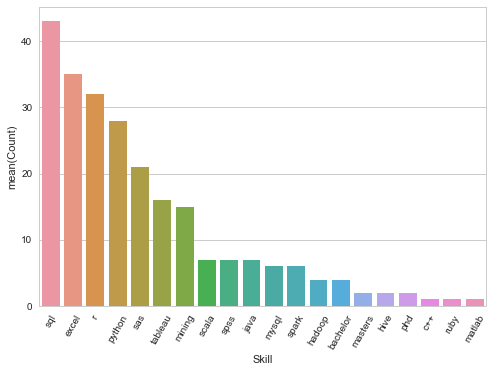

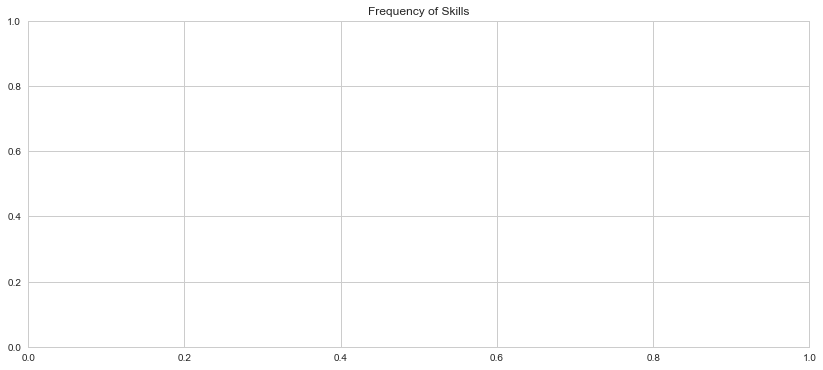

In [67]:
sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x=Result.Skill, y=Result.Count, data=Result)

#Credit Pierdom
#https://gist.github.com/pierdom/8f265d81031770226938de6cb41812d9
plt.figure(figsize=(14, 6))
for item in ax.get_xticklabels():
    item.set_rotation(60)
plt.title('Frequency of Skills')
plt.show()


In [68]:
Result.head(5)

#Top five skills people want


,Skill,Count,Ranking
14,sql,43,0.693548
6,excel,35,0.564516
12,r,32,0.516129
4,python,28,0.451613
15,sas,21,0.338710


In [69]:
#if i had more time I would link the skills with salary

In [70]:

#users.query('age < 20'

In [71]:
list(seek_fnl)

['Industry', 'Salary', 'Skills', 'Title', 'Type', 'City']

In [72]:
#Lets do a logisitic regression to predict salaries based on information in dataframe

#If I had more time I would try and do something more complex but in this case I just want to
#demonstrate my workflow.

In [73]:
#Define predictor variables
X = seek_fnl.drop(['Industry','Skills','Title','Salary'], axis=1)
#X.head()

In [74]:
#Convert 'Type' and 'City' to dummies
X = pd.get_dummies(X)
X.head()

,Type_Contract,Type_Full Time,Type_Part Time,City_ACT,City_Brisbane,City_Cairns,City_Melbourne,City_Perth,City_Sydney
1,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,1
12,1,0,0,0,0,0,0,0,1


In [75]:
#Let's split salaries into 2 categories: high and low based on the mean salary: $128,267.
y=[]
for salary in seek_fnl.Salary:
    if salary <= 128267:
        y.append(0)
    else:
        y.append(1)
#*********************
#If we get fancy and split salary into 3 categories:
    #low <$95,000, 
    #95,000 < medium < 158,000 
    #high > 158000.  

    #Low and high determined from percentiles
# for salary in seek_fnl.Salary:
#     if salary <= 95000:
#         y.append(0)
#     elif salary <= 158000:
#         y.append(1)
#     else:
#         y.append(2)

In [76]:
#Standardize variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [77]:
#Lets set up our training and testing

In [78]:
#Credit James Wedell
#https://wedelljd.github.io/wedelljd.github.io/Predicting-Data-Scientist-Salaries-Using-Web-Scraping/

#from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
#from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
#from sklearn.grid_search import GridSearchCV
#from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV


model = LogisticRegressionCV(cv=3)
model.fit(Xs, y) # This trains the model using 3 cross validated sets from the data

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, Xs, y, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

/Users/gopetro/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


mean accuracy: 0.722866344605, all: [ 0.76086957  0.65217391  0.75555556]
mean precision: 0.668209876543, all: [ 0.62962963  0.625       0.75      ]
mean recall: 0.583877995643, all: [ 0.94444444  0.27777778  0.52941176]
mean roc_auc: 0.718876439465, all: [ 0.83928571  0.64087302  0.67647059]


Let's see how this compares to a baseline guess

In [79]:
random_guess = []
over_128K = []
under_128K = []
#y is the prediction target set
for i in y:
    random_guess.append(random.randint(0,1))
    over_128K.append(1)
    under_128K.append(0)
print
print("Random Guess: {0:.2%}".format(accuracy_score(y, random_guess)))
print("Over 128K: {0:.2%}".format(accuracy_score(y, over_128K)))
print("Under 128K: {0:.2%}".format(accuracy_score(y, under_128K)))
#{percent:.2%}'.format(percent=1.0/3.0)


Random Guess: 51.82%
Over 128K: 38.69%
Under 128K: 61.31%


So it looks like the model prediction (72.3%) is an improvement over a random guess.

In [80]:
#If I had more time I would try and perform this using cross validation.  
#I made an attempt but couldn't get my code to work properly



In [81]:
#Let's try and see if we get better results using random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Using Decision Tree
dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(Xs, y)

#Using Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto')
rf.fit(Xs, y)
yhat = rf.predict(Xs)

print 'Using Decision Tree'
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(dtc, Xs, y, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

print 'Using Random Forest'
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(rf, Xs, y, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))
    

Using Decision Tree
mean accuracy: 0.74460547504, all: [ 0.7826087   0.69565217  0.75555556]
mean precision: 0.686324786325, all: [ 0.7         0.66666667  0.69230769]
mean recall: 0.528322440087, all: [ 0.77777778  0.27777778  0.52941176]
mean roc_auc: 0.638246965453, all: [ 0.74305556  0.47420635  0.69747899]
Using Random Forest
mean accuracy: 0.74460547504, all: [ 0.7826087   0.69565217  0.75555556]
mean precision: 0.733333333333, all: [ 0.7   0.75  0.75]
mean recall: 0.546840958606, all: [ 0.77777778  0.33333333  0.52941176]
mean roc_auc: 0.691409897292, all: [ 0.77777778  0.6031746   0.69327731]


## Bonus section

In [114]:
#Let's look at the confusion matrix
import numpy as np

#Predictions and probabilities
y_pred = model.predict(Xs)
y_pred_pp = model.predict_proba(Xs)
confusion = np.array(confusion_matrix(y, y_pred))

print(confusion)

[[68 16]
 [21 32]]


In [115]:
# calculate true positives, the number of 1s correctly predicted to be 1
TP = confusion[0,0]

# calculate false positives, the number of 0s incorrectly predicted to be 1
FP  = confusion[1,0]

# calculate true negatives, the number of 0s correctly predicted to be 0
TN = confusion[1,1]

# calculate false negatives, the number of 1s incorrectly predicted to be 0
FN = confusion[0,1]

In [116]:
conmat = np.array(confusion_matrix(y, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['Below 128k', 'Above $128k'],
                         columns=['predicted_below_$128k','predicted_above_$128k'])
confusion

,predicted_below_$128k,predicted_above_$128k
Below 128k,32,21
Above $128k,16,68


In [117]:
# Classification Report

#Printout:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.76      0.81      0.79        84
          1       0.67      0.60      0.63        53

avg / total       0.73      0.73      0.73       137



In [118]:
pp = pd.DataFrame(y_pred_pp, columns=['Below_128k','Above_128k'])
pp.head()

,Below_128k,Above_128k
0,0.247180,0.752820
1,0.424648,0.575352
2,0.424648,0.575352
3,0.424648,0.575352
4,0.424648,0.575352


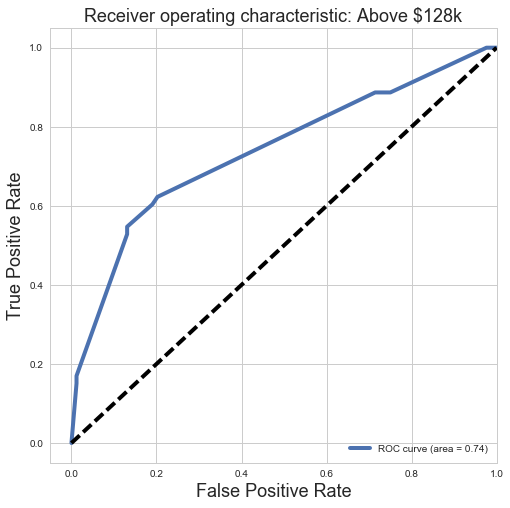

In [119]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, y_pred_pp[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: Above $128k', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Interpretation of Results

Model Comparison of accuracy
Baseline: 62.7%
Logisitic Reg: 72.3%
Decision Tree: 72.3%
Random Forest: 74.5%

Model Comparison of Precision
Baseline: 62.7%
Logisitic Reg: 66.8%
Decision Tree: 73.3%
Random Forest: 73.3%

Model Comparison of Recall
Baseline: 62.7%
Logisitic Reg: 58.4%
Decision Tree: 52.8%
Random Forest: 54.7%

Model Comparison of ROC/AUC
Baseline: 62.7%
Logisitic Reg: 71.9%
Decision Tree: 67.4%
Random Forest: 71.3%

In terms of accuracy and precision all the models were a large improvement on the baseline.

I used job type and city to predict salaries above and below the mean. Random forest method resulted in the best accuracy however the incremental improvement over logicitical regression was just under 2%.  Given the processing time of random forest the best solution might be to use logistical.  Looking at the confusion matrix we can see that we are better at predicting below $128k vs above.

In order to improve this model it would be more useful incorporate the skills and job title column.  Both columns require more cleaning.  The job title coulmn has too many categoreis and the skills column requires some splitting.  Once those columns are fixed we could then bin the salary column into more bins like: low, medium and high.


## Bonus section

In [128]:
#We would rather tell client that they would get a lower salary than expected.
# So we need to lower the threshold


for thresh in np.arange(1,10)/10.:
    labeled_Above_128k = np.array([1 if x >= thresh else 0 for x in pp.Above_128k.values])
    print 'Threshold:', thresh, 'false positives:', np.sum((y_pred == 0) & (labeled_Above_128k == 1))
#print pp.Above_128k
#labeled_Above_128k

Threshold: 0.1 false positives: 89
Threshold: 0.2 false positives: 87
Threshold: 0.3 false positives: 2
Threshold: 0.4 false positives: 2
Threshold: 0.5 false positives: 0
Threshold: 0.6 false positives: 0
Threshold: 0.7 false positives: 0
Threshold: 0.8 false positives: 0
Threshold: 0.9 false positives: 0


In [121]:
#Looks like the minimum threshold is between 0.20 - 0.30

In [146]:
Y_pp = pd.DataFrame(y_pred_pp, columns=['class_0_pp','class_1_pp'])
Y_pp.head()

,class_0_pp,class_1_pp
0,0.247180,0.752820
1,0.424648,0.575352
2,0.424648,0.575352
3,0.424648,0.575352
4,0.424648,0.575352


In [147]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head(10)

# pp = pd.DataFrame(y_pred_pp, columns=['Below_128k','Above_128k'])
# #print pp.head()

# pp['pred_thresh10'] = [1 if x >= 0.10 else 0 for x in pp.Above_128k.values]
# pp.head()


,class_0_pp,class_1_pp,pred_class_thresh10
0,0.247180,0.752820,1
1,0.424648,0.575352,1
2,0.424648,0.575352,1
3,0.424648,0.575352,1
4,0.424648,0.575352,1
5,0.247180,0.752820,1
6,0.487874,0.512126,1
7,0.247180,0.752820,1
8,0.762272,0.237728,1
9,0.424648,0.575352,1


In [156]:
#Recompute confusion matrix using threshold

conmat = np.array(confusion_matrix(y, pp.pred_thresh10, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['Below 128k', 'Above $128k'],
                         columns=['predicted_below_$128k','predicted_above_$128k'])
confusion

,predicted_below_$128k,predicted_above_$128k
Below 128k,53,0
Above $128k,84,0


Notice that by lowering the threshold we are move all salary guess into the lower category.

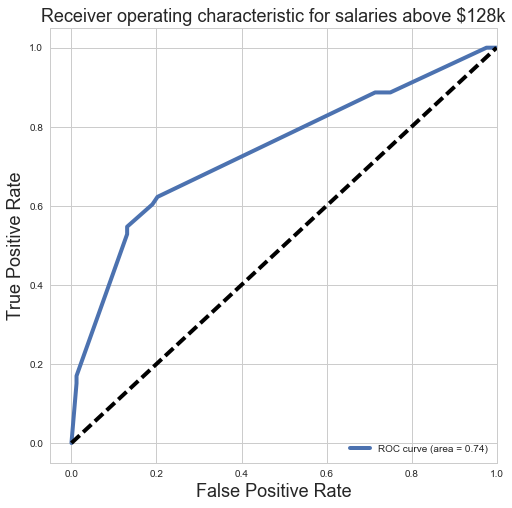

In [158]:
# For class 1, find the area under the curve with adjusted threshold
#This should look more square but it is just the same as above.

fpr, tpr, _ = roc_curve(y, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for salaries above $128k', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#The above is incorrect.  It should look square since all predicitons are in the lower category.